<a href="https://colab.research.google.com/github/catsnyan/catsnyan/blob/main/Introduction_to_Data_Science_SQLite_(Lab_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1. Install SQLite

pip is the package installer for Python. It allows you to install and manage additional libraries and dependencies that are not part of the standard Python library

In [ ]:
# SQLite comes with Python versions >= 2.5
!pip install pysqlite3

# 1.2 Create a Database

In [ ]:
import sqlite3

# Connect to db/ create db if it doesn't exist
conn = sqlite3.connect('example.db')

# Close connection when done
conn.close()

# 1.3 Create a Table

### Primary Key: Takeaways
- If we try to insert a row with an id value that already exists, SQLite will throw an error because primary key values must be unique.
- If we don't specify an id value when inserting, SQLite will auto-generate one for us.


### Other Qualifiers

- SQLite will raise an error if the name is NULL or email is not UNIQUE



In [ ]:
conn = sqlite3.connect('example.db')
cursor = conn.cursor()

# Create a new table
# cursor is an iterator
# .execute parses the query, passes it on to the database
cursor.execute('''
CREATE TABLE users (
    id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    age INTEGER,
    email TEXT UNIQUE,
    org TEXT
)
''')


conn.commit() # Commit the changes and close the connection -> Write
conn.close() # Close the connection

## Primary Key: Analogy
Imagine a large library with millions of books. Each book has a unique identification number, called an **ISBN (International Standard Book Number) + Decimal Number**. ISBN + Decimal Number ensures that every book can be uniquely identified, even if there are multiple copies of the same book or different books with the same title.

In this analogy:

- The library is like a database.
- Each book represents a record or a row in a table.
- The ISBN + Decimal Number is like the primary key of the table. Just as no two books in the library can have the same ISBN + Decimal Number, no two records in a database table can have the same primary key.


This system allows users of the database to quickly locate a specific book in a vast collection.

In [ ]:
"""
What if table already exists?
"""
# cursor.execute('''
# CREATE TABLE IF NOT EXISTS users (
#     id INTEGER PRIMARY KEY,
#     name TEXT NOT NULL,
#     age INTEGER,
#     email TEXT UNIQUE,
#     org TEXT
# )
# ''')

# 1.4 Insert New Records
## Cursor Objects
- A cursor is a database control structure that you use to execute SQL queries and fetch results
- It acts as an intermediary between the user and the database, allowing for the execution of SQL statements and retrieval of results.
- The cursor object (cursor) provides methods like execute, executemany, and fetchall to interact with the database.

In [ ]:
# Catch the error
conn = sqlite3.connect('example.db')
cursor = conn.cursor()

# Insert new records
data = [("John", 30, "john.doe@example.com", "meta"), ("Jane", 22, "jane.doe@example.com", "hp")]
cursor.executemany("INSERT INTO users (name, age, email) VALUES (?, ?, ?, ?)", data)

conn.commit()
conn.close()

In [ ]:
conn = sqlite3.connect('example.db')
cursor = conn.cursor()

# Insert new records
data = [("John", 30, "john.doe@example.com", "meta"), ("Jane", 22, "jane.doe@example.com", "hp"), ("James", 22, "james.doe@example.com", "meta")]
cursor.executemany("INSERT OR IGNORE INTO users (name, age, email, org) VALUES (?, ?, ?, ?)", data)

conn.commit()
conn.close()

In [ ]:
"""
Inserting from a csv
"""

# import csv

# with open('users.csv', 'r') as file:
#     # Use DictReader to read CSV as a list of dictionaries
#     reader = csv.DictReader(file)
#     to_db = [(i['name'], i['age'], i['email']) for i in reader]

# cursor.executemany("INSERT OR IGNORE INTO users (name, age, email) VALUES (?, ?, ?);", to_db)
# conn.commit()
# conn.close()

# 1.5 Fetch Records

In [ ]:
conn = sqlite3.connect('example.db')
cursor = conn.cursor()

# Fetch all records
cursor.execute("SELECT * FROM users")
all_users = cursor.fetchall()
all_users

[(1, 'John', 30, 'john.doe@example.com', 'meta'),
 (2, 'Jane', 22, 'jane.doe@example.com', 'hp'),
 (3, 'James', 22, 'james.doe@example.com', 'meta')]

In [ ]:
"""Fetch records with a WHERE clause"""

cursor.execute("SELECT * FROM users WHERE age > ?", (25,))
users_above_25 = cursor.fetchall()
users_above_25

[(1, 'John', 30, 'john.doe@example.com', 'meta')]

# 1.6 Group By and Aggregations

In [ ]:
# COUNT, SUM, AVG, MAX, MIN

cursor.execute("SELECT org, COUNT(*) FROM users GROUP BY org")
count_org = cursor.fetchall()
for user in count_org:
    print(user)

('hp', 1)
('meta', 2)


In [ ]:
# cursor.execute('''CREATE TABLE agg (org TEXT PRIMARY KEY, count_org INTEGER)''')
# conn.commit()

In [ ]:
# cursor.executemany("INSERT into agg (org, count_org) VALUES (?, ?)", count_org)

In [ ]:
# cursor.execute("SELECT * from agg")
# count_org = cursor.fetchall()

In [ ]:
# Order by (using numbers)
cursor.execute("SELECT org, COUNT(*) FROM users GROUP BY org ORDER BY 1 DESC")
count_org = cursor.fetchall()
for user in count_org:
    print(user)

('meta', 2)
('hp', 1)


# 1.7 Advanced Concepts
## 1.7.1 Transactions
Transactions allow you to execute a series of operations as a single unit. If one operation fails, the entire transaction can be rolled back, ensuring data integrity.

In [ ]:
conn = sqlite3.connect('example2.db')
cursor = conn.cursor()

try:
    cursor.execute("INSERT INTO users (name, age, email) VALUES (?, ?, ?)", ("Alice", 28, "alice@example.com"))
    cursor.execute("INSERT INTO users (name, age, email) VALUES (?, ?, ?)", ("Bob", 32, "bob@example.com"))
    conn.commit()
except:
    conn.rollback()

In [ ]:
conn = sqlite3.connect('example2.db')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

for table in tables:
    print(table[0])

**Atomicity:**
- This property ensures that a transaction is treated as a single, indivisible unit of work.
- Either all of its changes are committed to the database, or if the transaction fails, none of its changes are committed.
- In other words, database transactions are atomic; they are either fully completed or fully rolled back.

## 1.7.2 Concurrency
In an online ticket booking system, when Alice selects a ticket, the system temporarily locks it. Simultaneously, if Bob tries to select the same ticket, the system informs him it's being processed by another user. This concurrency control ensures that both Alice and Bob can't purchase the same ticket, preventing conflicts and maintaining data consistency. Proper concurrency mechanisms are crucial in databases to handle simultaneous operations without data inconsistencies.

- When one connection starts writing to the database, SQLite locks the entire file until the write is complete

- Other connections can read from the database during this time but cannot write.

## 1.7.3 Indexing

In [ ]:
import sqlite3
import time

# Setup
conn = sqlite3.connect(':memory:')  # Create an in-memory database for faster operations
cursor = conn.cursor()
cursor.execute('''
CREATE TABLE users (
    id INTEGER PRIMARY KEY,
    email TEXT
)
''')
# Insert 1 million dummy email records
for i in range(1000000):
    cursor.execute("INSERT INTO users (email) VALUES (?)", (f"user{i}@example.com",))
conn.commit()

# Without Index
start_time = time.time()
cursor.execute("SELECT * FROM users WHERE email='user999999@example.com'")
print("Without Index: --- %s seconds ---" % (time.time() - start_time))


Without Index: --- 0.07933354377746582 seconds ---


In [ ]:
# Create an index on the email column
cursor.execute("CREATE INDEX idx_email ON users (email)")

# With Index
start_time = time.time()
cursor.execute("SELECT * FROM users WHERE email='user999999@example.com'")
print("With Index: --- %s seconds ---" % (time.time() - start_time))

conn.close()

With Index: --- 0.00021123886108398438 seconds ---


**Indexing** the email column creates a data structure (typically a B-tree) that improves the speed of data retrieval operations on that column.

- Storage Overhead: The index consumes additional disk space. This overhead can be significant, the trade-off is the faster query performance.

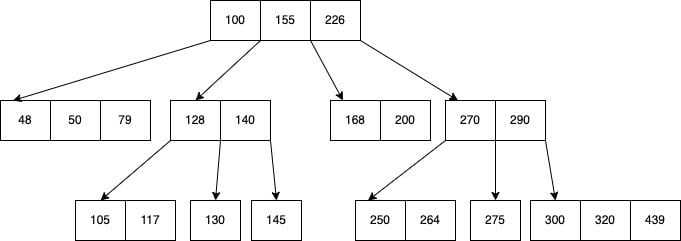

# Resources
**More SQL commands:** https://github.com/AmanSinghal927/Intro-to-DS-SQL/blob/main/sql_presenter.md

**Interview Style SQL Practice Questions:** https://github.com/TulipAggarwal/LeetCode-SQL50-Solutions

**More Advanced Concepts:** https://www.sqlite.org/docs.html